### Este notebook contém uma análise de algum dos algoritmos mais famosos como, insertion sort, selection sort, bubble sort, quicksort, heapsort, mergesort, tim sort e couting sort.


In [231]:
!pip install tabulate
import time
from tabulate import tabulate
import matplotlib.pyplot as plt

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


## Funções Auxiliares

In [232]:
def lerArquivo(file):
    dados = []
    f = open(file, 'r')
    for linha in f.readlines():
        valores = linha.replace("\n", "").split("\t")
        for valor in valores:
            dados.append(int(valor))
    f.close()
    return dados


In [233]:
dados_1k = lerArquivo('./entradas/1000.txt')
dados_5k = lerArquivo('./entradas/5000.txt')
dados_10k = lerArquivo('./entradas/10000.txt')
dados_20k = lerArquivo('./entradas/20000.txt')
dados_50k = lerArquivo('./entradas/50000.txt')
dados_75k = lerArquivo('./entradas/75000.txt')
dados_100k = lerArquivo('./entradas/100000.txt')
conjunto_dados = [dados_1k, dados_5k, dados_10k, dados_20k, dados_50k, dados_75k, dados_100k]
print(
    len(dados_1k), 
    len(dados_5k), 
    len(dados_10k),
    len(dados_20k),
    len(dados_50k),
    len(dados_75k),
    len(dados_100k)
)


1000 5000 10000 20000 50000 75000 100000


In [234]:
def calcula_tempo(algoritmo, dado):
    tempo_inicial = time.time()
    algoritmo(dado.copy())
    tempo_final = time.time()
    tempo_decorrido = tempo_final - tempo_inicial
    return tempo_decorrido

def executa_sequencia(algoritmo):
    tempos_de_execucao = []
    for dado in conjunto_dados:
        tempo = calcula_tempo(algoritmo, dado)
        tempos_de_execucao.append(tempo)
    return tempos_de_execucao

## Insertion Sort

In [235]:
def insertionSort(dados):
    for indice in range (1, len(dados)):
        chave = dados[indice]
        pivo = indice-1
        while pivo >= 0 and chave < dados[pivo]:
            dados[pivo+1] = dados[pivo]
            pivo -= 1
        dados[pivo+1] = chave
    return dados

## QuickSort

In [236]:
def particao(arr, menor, maior):
    i = (menor-1)
    pivo = arr[maior]
 
    for j in range(menor, maior):
        if arr[j] <= pivo:
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
 
    arr[i+1], arr[maior] = arr[maior], arr[i+1]
    return (i+1)

def quickSort(arr, menor, maior):
    if len(arr) == 1:
        return arr
    if menor < maior:
        pi = particao(arr, menor, maior)
        quickSort(arr, menor, pi-1)
        quickSort(arr, pi+1, maior)

#### Função auxiliar para quicksort

In [237]:
def calcula_tempo_quicksort(dado):
    tempo_inicial = time.time()
    quickSort(dado.copy(), 0, len(dado)-1)
    tempo_final = time.time()
    tempo_decorrido = tempo_final - tempo_inicial
    return tempo_decorrido

def executa_sequencia_quicksort():
    tempos_de_execucao = []
    for dado in conjunto_dados:
        tempo = calcula_tempo_quicksort(dado)
        tempos_de_execucao.append(tempo)
    return tempos_de_execucao

## Tim Sort

In [238]:
MIN_MERGE = 32

def calcMinExecucao(n): 
    r = 0
    while n >= MIN_MERGE: 
        r |= n & 1
        n >>= 1
    return n + r 
  
def merge(arr, l, m, r): 
    len1, len2 = m - l + 1, r - m 
    esquerda, direita = [], [] 
    for i in range(0, len1): 
        esquerda.append(arr[l + i]) 
    for i in range(0, len2): 
        direita.append(arr[m + 1 + i]) 
  
    i = 0
    j = 0
    k = l

    while i < len1 and j < len2: 
        if esquerda[i] <= direita[j]: 
            arr[k] = esquerda[i] 
            i += 1
        else: 
            arr[k] = direita[j] 
            j += 1
        k += 1
  
    while i < len1: 
        arr[k] = esquerda[i] 
        k += 1
        i += 1
  
    while j < len2: 
        arr[k] = direita[j] 
        k += 1
        j += 1
  
def insertionSortParcial(arr, esquerda, direita): 
    for i in range(esquerda + 1, direita + 1): 
        j = i 
        while j > esquerda and arr[j] < arr[j - 1]: 
            arr[j], arr[j - 1] = arr[j - 1], arr[j] 
            j -= 1
          
def timSort(arr): 
    n = len(arr) 
    minExecucao = calcMinExecucao(n) 
      
    for inicio in range(0, n, minExecucao): 
        fim = min(inicio + minExecucao - 1, n - 1) 
        insertionSortParcial(arr, inicio, fim) 
  
    size = minExecucao 
    while size < n: 
        for esquerda in range(0, n, 2 * size): 
            meio = min(n - 1, esquerda + size - 1) 
            direita = min((esquerda + 2 * size - 1), (n - 1)) 
            merge(arr, esquerda, meio, direita) 
  
        size = 2 * size 
  

## Couting Sort

In [239]:
def count_sort(arr): 
    elemento_max = int(max(arr)) 
    elemento_min = int(min(arr)) 
    intervalo_de_elementos = elemento_max - elemento_min + 1
    arr_de_contagem = [0 for _ in range(intervalo_de_elementos)] 
    arr_de_saida = [0 for _ in range(len(arr))] 
  
    for i in range(0, len(arr)): 
        arr_de_contagem[arr[i]-elemento_min] += 1
  
    for i in range(1, len(arr_de_contagem)): 
        arr_de_contagem[i] += arr_de_contagem[i-1] 
  
    for i in range(len(arr)-1, -1, -1): 
        arr_de_saida[arr_de_contagem[arr[i] - elemento_min] - 1] = arr[i] 
        arr_de_contagem[arr[i] - elemento_min] -= 1

    for i in range(0, len(arr)): 
        arr[i] = arr_de_saida[i] 
  
    return arr 

## Comparativo de tempo

In [240]:
tempos_insertion = executa_sequencia(insertionSort)
tempos_quick = executa_sequencia_quicksort()
tempos_tim = executa_sequencia(timSort)
tempos_count = executa_sequencia(count_sort)

In [254]:
dados_tabulados = [["insertionSort"]+tempos_insertion[:3], ["quickSot"]+tempos_quick[:3], ["timSort"]+tempos_tim[:3], ["countSort"]+tempos_count[:3]]
print(tabulate(dados_tabulados, headers=["algoritmo", "1k", "5k", "10k"], tablefmt="github"))


| algoritmo     |         1k |         5k |       10k |
|---------------|------------|------------|-----------|
| insertionSort | 0.069207   | 1.54977    | 6.33348   |
| quickSot      | 0.00299788 | 0.0198421  | 0.0396318 |
| timSort       | 0.00700283 | 0.038491   | 0.0783219 |
| countSort     | 0.00123072 | 0.00524592 | 0.01109   |


In [255]:
dados_tabulados = [["insertionSort"]+tempos_insertion[3:], ["quickSot"]+tempos_quick[3:], ["timSort"]+tempos_tim[3:], ["countSort"]+tempos_count[3:]]
print(tabulate(dados_tabulados, headers=["algoritmo", "20k", "50k", "75k", "100k"], tablefmt="github"))


| algoritmo     |        20k |         50k |        75k |       100k |
|---------------|------------|-------------|------------|------------|
| insertionSort | 27.031     | 176.051     | 419.3      | 749.605    |
| quickSot      |  0.0858529 |   0.287012  |   0.396536 |   0.497533 |
| timSort       |  0.184901  |   0.467071  |   0.684903 |   0.965905 |
| countSort     |  0.0245838 |   0.0687308 |   0.104283 |   0.148122 |


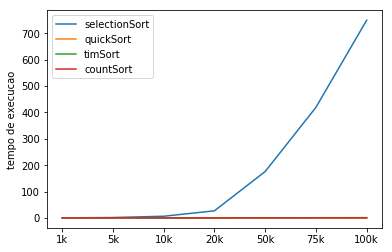

In [250]:
plt.plot(["1k", "5k", "10k", "20k", "50k", "75k", "100k"],tempos_insertion, label='selectionSort')
plt.plot(tempos_quick, label='quickSort')
plt.plot(tempos_tim, label='timSort')
plt.plot(tempos_count, label='countSort')
plt.ylabel('tempo de execucao')
plt.legend()
plt.show()

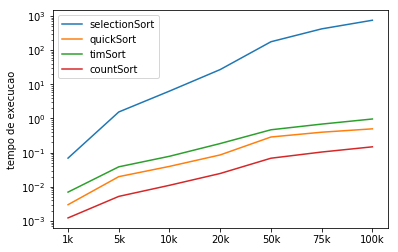

In [253]:
plt.plot(["1k", "5k", "10k", "20k", "50k", "75k", "100k"],tempos_insertion, label='selectionSort')
plt.plot(tempos_quick, label='quickSort')
plt.plot(tempos_tim, label='timSort')
plt.plot(tempos_count, label='countSort')
plt.ylabel('tempo de execucao')
plt.legend()
plt.yscale("log")
plt.show()

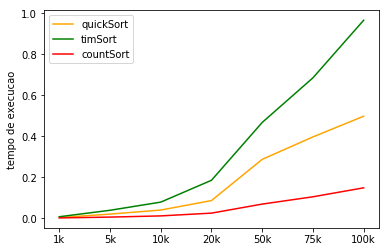

In [258]:
plt.plot(["1k", "5k", "10k", "20k", "50k", "75k", "100k"],tempos_quick, label='quickSort', color="orange")
plt.plot(tempos_tim, label='timSort', color="green")
plt.plot(tempos_count, label='countSort', color="red")
plt.ylabel('tempo de execucao')
plt.legend()
plt.show()